# Project 1 - Regression
## Predict total bikes that will be rented per day
### This notebook uses the *bike_day_v2.xlsx* 
Adaptation from Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

(c) Nuno António 2023 - Rev. 1.0

## Dataset description

- **instant**: record index
- **dteday** : date
- **season** : season (1:springer, 2:summer, 3:fall, 4:winter)
- **yr** : year (0: 2011, 1:2012)
- **mnth** : month ( 1 to 12)
- **holiday** : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0
- **schoolday** : if day is a normal school day is 1, otherwise is 0
- **weathersit** : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : Normalized temperature in Celsius. The values are divided to 41 (max)
- **atemp**: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant for a company that rent bikes in a city.</p>
<p>Your customer whishes to build a model to predict everyday at 15h00 the total number of bikes they will rent the following day. This will allow them not only to better allocate staff resources, but also to define their daily marketing budget in social media which is their principal form of advertisement.</p>

### Questions or additional information
For any additional questions, don't hesitate to get in touch with the instructors. The instructors will also act as the company business/project stakeholder.

Group O 
Muhammet Emin Imir 20231378
EBUKA NWACHUKWU 20230089
OJI Chimezie Alexander 20221432
Syed Akhteruzzaman  20230060

## Initializations and data loading

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from yellowbrick.model_selection import RFECV
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError


# DATA UNDERSTANDING

In [2]:
#DATA UNDERSTANDING
# Loading the dataset and visualizing summary statistics
ds = pd.read_excel('bike_day_v2.xlsx', engine='openpyxl')
ds.describe(include='all').T

C:\Users\nwach\AppData\Local\Temp\ipykernel_3728\1038487648.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
instant,732.0,NaN,NaT,NaN,NaT,NaT,366.352459,211.236679,1.0,183.75,366.5,549.25,731.0
dteday,732,731,2012-09-15,2,2011-01-01,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,732.0,NaN,NaT,NaN,NaT,NaT,2.497268,1.110203,1.0,2.0,3.0,3.0,4.0
yr,732.0,NaN,NaT,NaN,NaT,NaT,0.501366,0.50034,0.0,0.0,1.0,1.0,1.0
mnth,732.0,NaN,NaT,NaN,NaT,NaT,6.523224,3.450769,1.0,4.0,7.0,10.0,12.0
holiday,732.0,NaN,NaT,NaN,NaT,NaT,0.028689,0.167044,0.0,0.0,0.0,0.0,1.0
weekday,730.0,NaN,NaT,NaN,NaT,NaT,3.00274,2.004793,0.0,1.0,3.0,5.0,6.0
workingday,732.0,NaN,NaT,NaN,NaT,NaT,0.68306,0.465602,0.0,0.0,1.0,1.0,1.0
schoolday,454.0,NaN,NaT,NaN,NaT,NaT,0.460352,0.498975,0.0,0.0,0.0,1.0,1.0
weathersit,732.0,NaN,NaT,NaN,NaT,NaT,1.394809,0.544718,1.0,1.0,1.0,2.0,3.0


In [3]:
# Show top rows
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,schoolday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6.0,0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0.0,0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1.0,1,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2.0,1,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3.0,1,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Exploratory data analysis
#missing values
ds.isnull().sum() #To check for missing values

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         2
workingday      0
schoolday     278
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [5]:
#To show the missing values in weekday
ds[ds['weekday'].isnull()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,schoolday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
190,191,2011-07-10,3,0,7,0,NaN,0,0.0,1,0.747500,0.690025,0.578333,0.183471,1743,3138,4881
195,196,2011-07-15,3,0,7,0,NaN,1,1.0,1,0.663333,0.624371,0.591250,0.182833,1318,4220,5538


In [6]:
#filling the empty rows in weekday
ds.at[190, 'weekday'] = 0
ds.at[195, 'weekday'] = 5

In [7]:
#to check how many schoolday are also workdays in the data available
same_value= (ds['workingday']!=ds['schoolday']).sum()
print(same_value)

374


In [8]:
#check for duplicate rows
duplicate_rows = ds[ds.duplicated()]
duplicate_rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,schoolday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
624,624,2012-09-15,3,1,9,0,6.0,0,0.0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


In [9]:
ds.drop_duplicates(inplace=True) #drop duplicates

In [10]:
ds['mnth']= ds['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
ds.mnth.value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    57
Name: mnth, dtype: int64

In [11]:
ds['season'] = ds['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
ds.season.value_counts()

Fall      188
Summer    184
Spring    181
Winter    178
Name: season, dtype: int64

In [12]:
ds['weekday'] = ds['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'})
ds.weekday.value_counts()

Sat     105
Sun     105
Mon     105
Tue     104
Wed     104
Thur    104
Fri     104
Name: weekday, dtype: int64

In [13]:
ds['weathersit'] = ds['weathersit'].map({1:'Clear', 2:'Mistcloudy', 3:'LightSnow', 4:'Heavyrain'})
ds.weathersit.value_counts()

Clear         463
Mistcloudy    247
LightSnow      21
Name: weathersit, dtype: int64

In [14]:
# Transform instant to a categorical
ds['instant'] = ds['instant'].astype('category')

WE DROP THE SCHOOLDAY COLUMN AS IT CONTAINS MANY MISSING VALUES

In [15]:

#Also we need to drop columns that would be redundant in building the decision tree
cols1 = ['dteday', 'schoolday', 'temp', 'casual', 'registered', 'yr']
ds.drop(columns=cols1, inplace=True)
ds

,instant,season,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,Spring,jan,0,Sat,0,Mistcloudy,0.363625,0.805833,0.160446,985
1,2,Spring,jan,0,Sun,0,Mistcloudy,0.353739,0.696087,0.248539,801
2,3,Spring,jan,0,Mon,1,Clear,0.189405,0.437273,0.248309,1349
3,4,Spring,jan,0,Tue,1,Clear,0.212122,0.590435,0.160296,1562
4,5,Spring,jan,0,Wed,1,Clear,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
727,727,Spring,dec,0,Thur,1,Mistcloudy,0.226642,0.652917,0.350133,2114
728,728,Spring,dec,0,Fri,1,Mistcloudy,0.255046,0.590000,0.155471,3095
729,729,Spring,dec,0,Sat,0,Mistcloudy,0.242400,0.752917,0.124383,1341
730,730,Spring,dec,0,Sun,0,Clear,0.231700,0.483333,0.350754,1796


In [16]:
# Exploration of categorical variables: cross table of season and workingday
tb1 = pd.crosstab(index=ds['season'], columns=ds['workingday'])
tb1

workingday,0,1
season,,
Fall,57,131
Spring,61,120
Summer,56,128
Winter,57,121


In [17]:
# Exploration of categorical variables: cross table of weathersit and holiday
tb2 = pd.crosstab(index=ds['weathersit'], columns=ds['holiday'])
tb2

holiday,0,1
weathersit,,
Clear,448,15
LightSnow,21,0
Mistcloudy,241,6


<Axes: xlabel='season'>

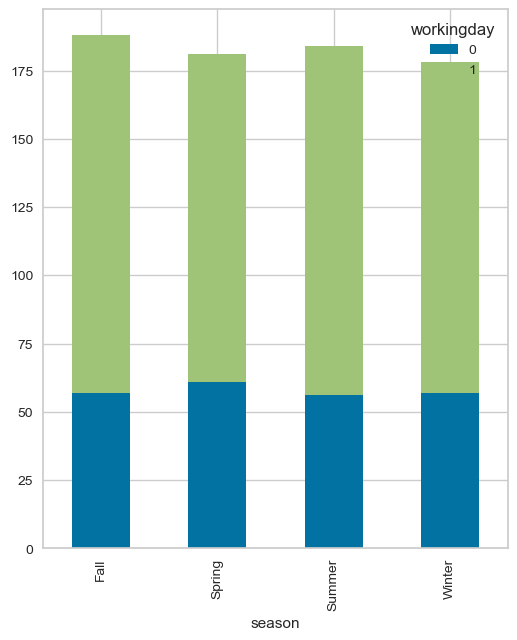

In [18]:
# Visual exploration of the cross table
tb1.plot(kind="bar", figsize=(6,7), stacked=True)

<Axes: xlabel='weathersit'>

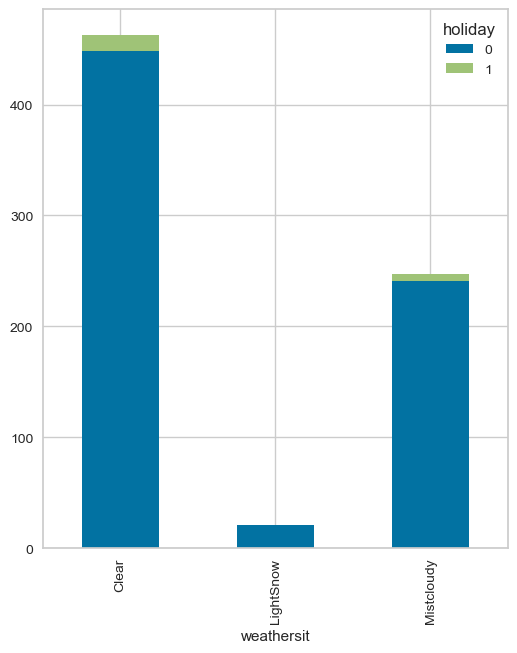

In [19]:
# Visual exploration of the cross table
tb2.plot(kind="bar", figsize=(6,7), stacked=True)

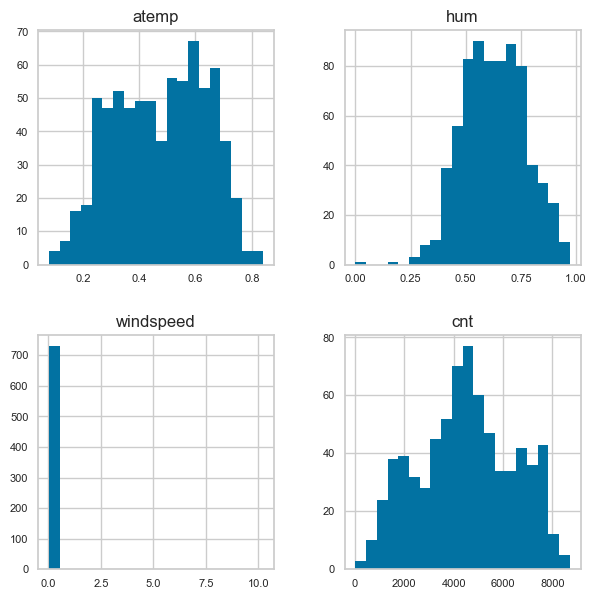

In [20]:
# histograms on some variables
variable= ['atemp', 'hum', 'windspeed', 'cnt']
ds[variable].hist(bins=20, figsize=(7, 7), layout=(2, 2), xlabelsize=8, ylabelsize=8);

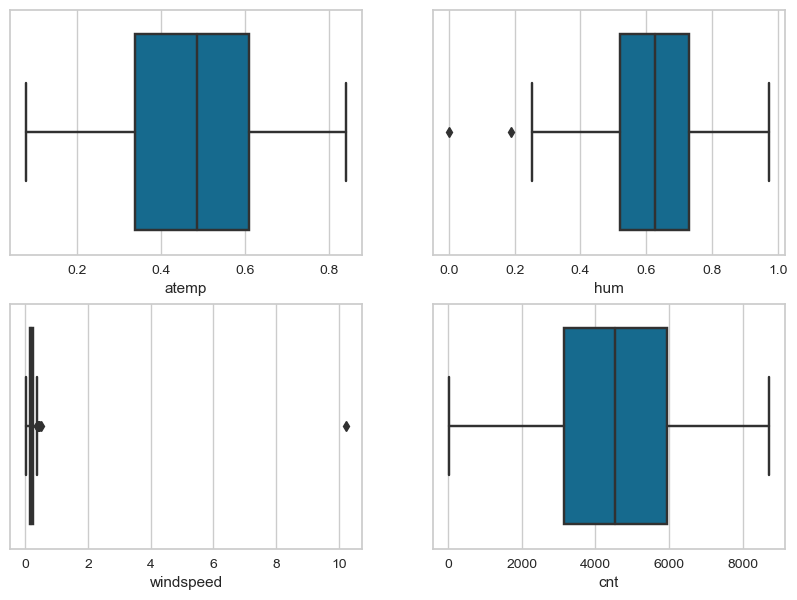

In [21]:
# boxplots
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
for var, subplot in zip(ds[variable], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

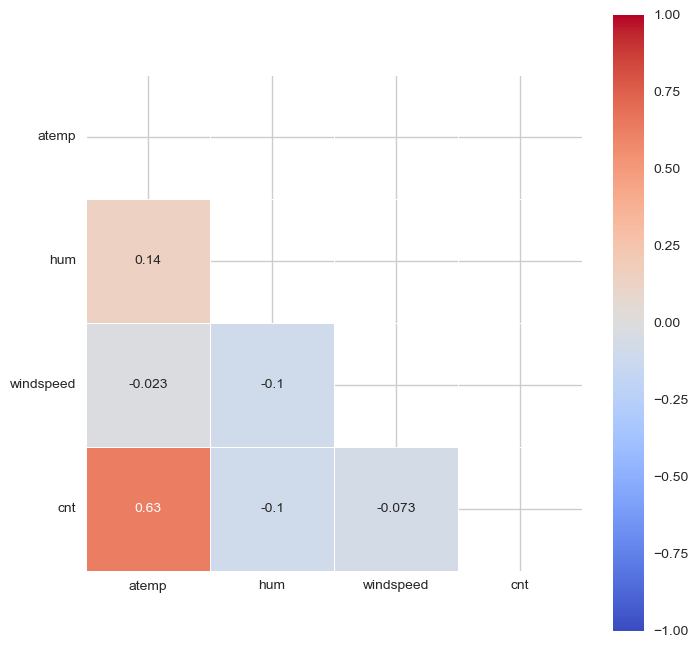

In [22]:

corr = ds[variable].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(8, 8))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 0)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [23]:
#to check if some holidays are also workdays in the data available
same_valu= (ds['workingday']==ds['holiday']).sum()
print(same_valu)

210


# DATA PREPARATION

In [18]:

# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

In [19]:
# Encode categorical values into dummy variables
cols = ['season', 'weathersit']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)

In [20]:
X.head()

,instant,season_Spring,season_Summer,season_Fall,season_Winter,mnth,holiday,weekday,workingday,weathersit_Mistcloudy,weathersit_Clear,weathersit_LightSnow,atemp,hum,windspeed,cnt
0,1,1,0,0,0,jan,0,Sat,0,1,0,0,0.363625,0.805833,0.160446,985
1,2,1,0,0,0,jan,0,Sun,0,1,0,0,0.353739,0.696087,0.248539,801
2,3,1,0,0,0,jan,0,Mon,1,0,1,0,0.189405,0.437273,0.248309,1349
3,4,1,0,0,0,jan,0,Tue,1,0,1,0,0.212122,0.590435,0.160296,1562
4,5,1,0,0,0,jan,0,Wed,1,0,1,0,0.229270,0.436957,0.186900,1600


In [21]:
#To remove outliers
#The data appears to have only a few outliers observing the box plots
X.drop(X[X.windspeed > 10].index, inplace=True) 
X.drop(X[X.hum < 0.2].index, inplace=True)

In [22]:
X.shape

(728, 16)

In [23]:
#Feature Engineering
#To create a weekend column
X['weekend'] = X['weekday'].apply(lambda x: 1 if x == 'Sun' or x == 'Sat' else 0)

#We need to create the target variable with is the next day cnt
X['Next_day_cnt'] = X['cnt'].shift(-1)
X = X.dropna(subset=['Next_day_cnt']) # To drop the last row with contains an empty next_day_cnt

In [24]:
X.shape

(727, 18)

# MODELING

In [25]:

# Create the target
y = X['Next_day_cnt']

In [26]:
# Drop not used columns
cols = ['Next_day_cnt', 'instant', 'weekday', 'mnth']
X = X.drop(columns=cols)

In [27]:
# Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X.values), columns=X.columns,index=X.index)

In [28]:
# Summary statistics for all variables after data preparation - Transpose
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
season_Spring,727.0,0.244842,0.430289,0.0,0.000000,0.000000,0.000000,1.0
season_Summer,727.0,0.251719,0.434300,0.0,0.000000,0.000000,1.000000,1.0
season_Fall,727.0,0.258597,0.438165,0.0,0.000000,0.000000,1.000000,1.0
season_Winter,727.0,0.244842,0.430289,0.0,0.000000,0.000000,0.000000,1.0
holiday,727.0,0.028886,0.167601,0.0,0.000000,0.000000,0.000000,1.0
workingday,727.0,0.683631,0.465379,0.0,0.000000,1.000000,1.000000,1.0
weathersit_Mistcloudy,727.0,0.338377,0.473483,0.0,0.000000,0.000000,1.000000,1.0
weathersit_Clear,727.0,0.634113,0.482010,0.0,0.000000,1.000000,1.000000,1.0
weathersit_LightSnow,727.0,0.027510,0.163678,0.0,0.000000,0.000000,0.000000,1.0
atemp,727.0,0.519503,0.214040,0.0,0.339674,0.536771,0.696732,1.0


In [30]:

# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 2021)

In [31]:
# Initialize model
lr_regr = linear_model.LinearRegression()

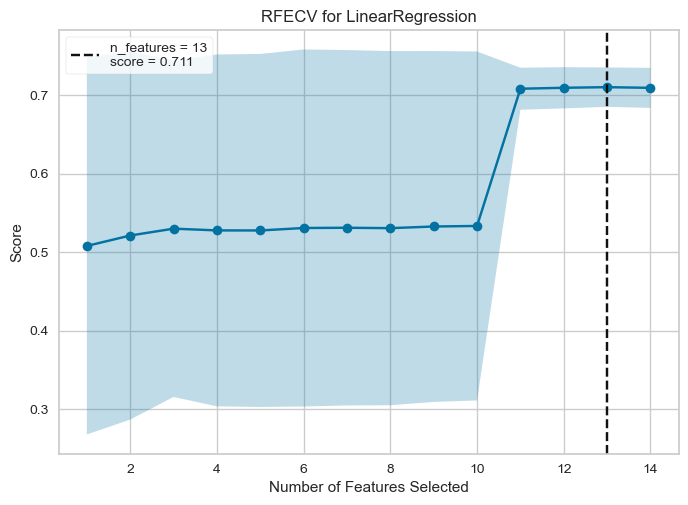

<Axes: title={'center': 'RFECV for LinearRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [32]:
#RFECV (Recursive Feature Elimination) to select features
vis = RFECV(lr_regr, cv=5, scoring='r2')
vis.fit(X_train, y_train)
vis.show()

In [33]:
# Features to include (all in this case)
X.columns[vis.support_]

Index(['season_Spring', 'season_Summer', 'season_Fall', 'season_Winter',
       'holiday', 'workingday', 'weathersit_Mistcloudy', 'weathersit_Clear',
       'weathersit_LightSnow', 'atemp', 'hum', 'cnt', 'weekend'],
      dtype='object')

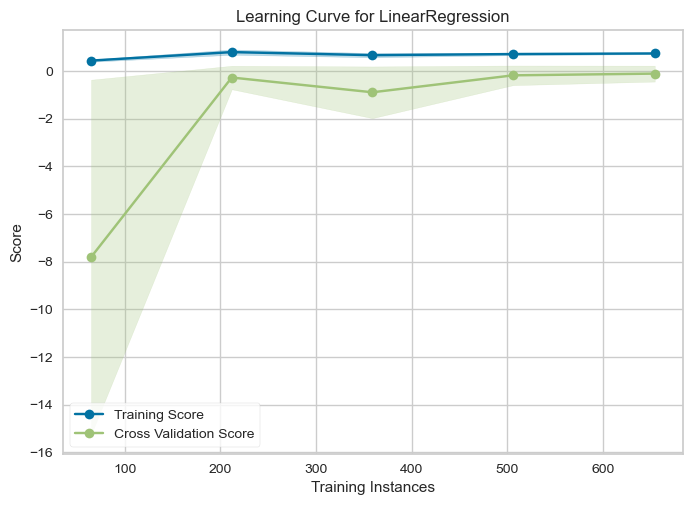

<Axes: title={'center': 'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [34]:
# Plot the learning curve
# Plot the learning curve
cv = 10
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=lr_regr, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X, y)
visualizer.show() 

In [35]:

# Create and train the model
lr_regr.fit(X_train, y_train)

LinearRegression()

In [36]:
# Print the Intercept
print('Intercept:',lr_regr.intercept_, '\n')

# Print Coefficients by descending "importance"
formattedList = [format(float(i),'.6f') for i in lr_regr.coef_]
formattedList2 = [format(abs(float(i)),'.6f') for i in lr_regr.coef_]
data_tuples = list(zip(X.columns,formattedList,formattedList2))
coeff_df = pd.DataFrame(data=data_tuples, columns=['Feature','Coefficient','AbsCoefficient'])
coeff_df['AbsCoefficient']=coeff_df['AbsCoefficient'].astype(float)
coeff_df.sort_values('AbsCoefficient', axis=0, inplace=True, ascending=False)
coeff_df

Intercept: -2.414862385900673e+16 



,Feature,Coefficient,AbsCoefficient
2,season_Fall,16289938713646118.000000,1.628994e+16
1,season_Summer,16289938713645842.000000,1.628994e+16
3,season_Winter,16289938713645672.000000,1.628994e+16
0,season_Spring,16289938713645400.000000,1.628994e+16
5,workingday,7456617643174569.000000,7.456618e+15
4,holiday,7456617643174370.000000,7.456618e+15
13,weekend,7456617643174325.000000,7.456618e+15
8,weathersit_LightSnow,402067502187359.500000,4.020675e+14
6,weathersit_Mistcloudy,402067502187252.000000,4.020675e+14
7,weathersit_Clear,402067502187180.500000,4.020675e+14


# EVALUATION

In [37]:
# predict y for X_train and X_test
y_pred_train = lr_regr.predict(X_train) 
y_pred_test = lr_regr.predict(X_test) 

In [38]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  metricsObj.mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [39]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,MAE,706.433028,661.467033
1,RMSE,1001.572245,926.755960
2,R^2,0.728713,0.770033
3,MAPE (%),0.590994,0.227427
4,MAX Error,5105.000000,3684.000000


C:\Users\nwach\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


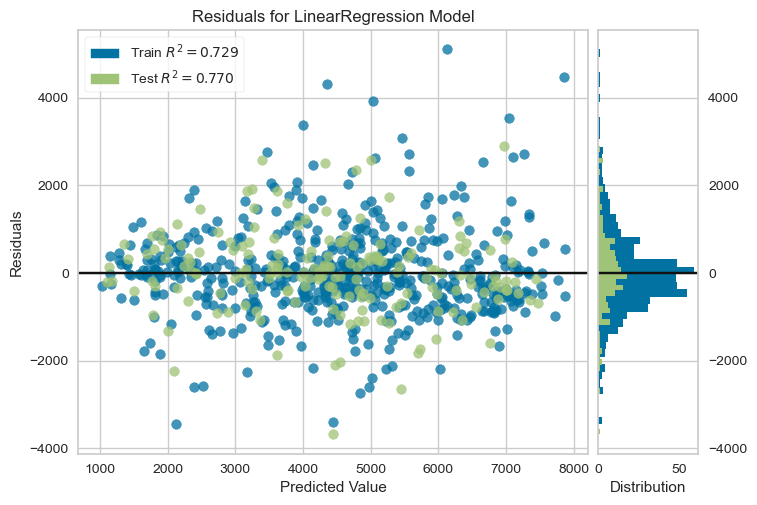

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
# Visualize the residuals
residuals_vis = ResidualsPlot(lr_regr)
residuals_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
residuals_vis.score(X_test, y_test)  # Evaluate the model on the test data
residuals_vis.show() 

C:\Users\nwach\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


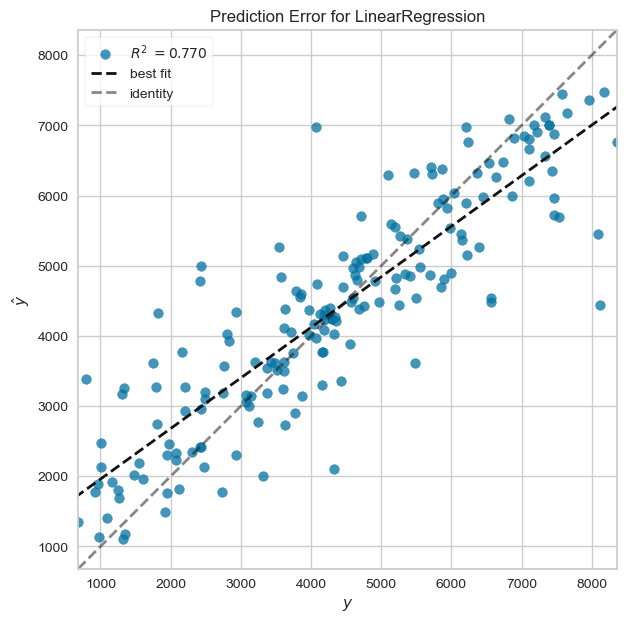

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [42]:
# Visualize the prediction error
fig, ax = plt.subplots(figsize=(9, 7))
predError_vis = PredictionError(lr_regr)
predError_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
predError_vis.score(X_test, y_test)  # Evaluate the model on the test data
predError_vis.show(ax=ax)